#### **1.1 About the Dataset**
- Wisconsin Breast Cancer dataset from the UCI Machine Learning Repository is a classification dataset containing records of breast cancer measurements.
  
- The dataset contains two classes, **benign** and **malignant**.

| Characteristics | Attributes | No. of Instances | No. of Attributes |
| --- | --- | --- | --- |
| Multivariate | Integer | 699 | 10 |

- The size of the dataset is `20kb`.

[More about the dataset: UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)

## **1. Importing Required Libraries**

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Statistical Analysis
import scipy.stats as stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Import the dataset**

In [2]:
# Breast Cancer Wisconsin (Diagnostic) Data Set
breast_cancer_data = pd.read_csv('./input/breast-cancer-wisconsin-original(2).csv')

breast_cancer_data.head(3)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


## **2. Data Exploration**

**Number of features in the dataset**

In [3]:
# Features in the dataset
print("Features in the dataset: \n{cols} \n\n Number of features in the dataset is {num_features}" 
.format(cols = list(breast_cancer_data.columns), num_features = len(breast_cancer_data.columns)))

Features in the dataset: 
['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'] 

 Number of features in the dataset is 11


**Description of the dataset**

Tabulation of descriptive statistics for the Wisconsin Breast Cancer dataset.

In [4]:
# Dataset Description
breast_cancer_data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
# Check data size and view first 10 rows
print(f"The data has {breast_cancer_data.shape[1]} features and {breast_cancer_data.shape[0]} rows\n")

The data has 11 features and 699 rows



In [6]:
# Information about the dataframe
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


From the above description, we can see that *most of the features in the dataset* is of type `int64` whereas, Bare Nuclei is `object` datatype.

In [7]:
breast_cancer_data['Class'].unique()

array([2, 4], dtype=int64)

The `class` column is a `categorical` type as it contains the values `2` - Benign and `4` - Malignant.

In [8]:
breast_cancer_data.shape

(699, 11)

In [9]:
df_A = breast_cancer_data[['Sample code number','Class']]

df_A.head(3)

,Sample code number,Class
0,1000025,2
1,1002945,2
2,1015425,2


In [10]:
breast_cancer_data.shape

(699, 11)

## **3. Data Preprocessing**

## Because Bare Nuclei is object, feature scaling cannot be done. So change it to numeric.

In [11]:
breast_cancer_data['Bare Nuclei'] = pd.to_numeric(breast_cancer_data['Bare Nuclei'], errors='coerce')

In [12]:
# Information about the dataframe
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


Data Cleaning

In [13]:
# Check for null values
breast_cancer_data.isnull().sum()
# The data has 16 null values of Bare Nuclei

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
features_data=breast_cancer_data.dropna(how='any')

In [15]:
# Check for null values again
features_data.isnull().sum()
# The data has 16 null values of Bare Nuclei

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [16]:
# Now we drop the sample code number column since it's doesn't contain valuable information
# breast_cancer_data.drop([breast_cancer_data.columns[0]], axis= 1, inplace= True)

**Note :** The below colums needs some attention
* `sample code number` - cannot be used for classification
* `class` - class labels

Thus *dropping* the above columns from the dataset.

In [17]:
# The labels are the class column
# Now we drop the sample code number column since it's doesn't contain valuable information
labels_data = features_data['Class']

list_a = ['Sample code number','Class']

# The features are the rest of the columns
features_data = features_data.drop(list_a, axis=1)

features_data.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1


In [18]:
features_data.shape

(683, 9)

In [19]:
# Our classes are encoded as '2' and '4' for benign and malignant respectively
# these two lines instead codes them at 0 and 1 for same classes
breast_cancer_data['Class'].loc[breast_cancer_data['Class'] == 2] = 0
breast_cancer_data['Class'].loc[breast_cancer_data['Class'] == 4] = 1

## Here become numpy array

# Separating the features and labels
features_data = breast_cancer_data.iloc[:, :-1].values
labels_data = breast_cancer_data.iloc[:, -1].values # The last column has the label value

In [20]:
breast_cancer_data['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

## **3.1 Data Visualization**

Number of Benign 458
Malignant count: 241


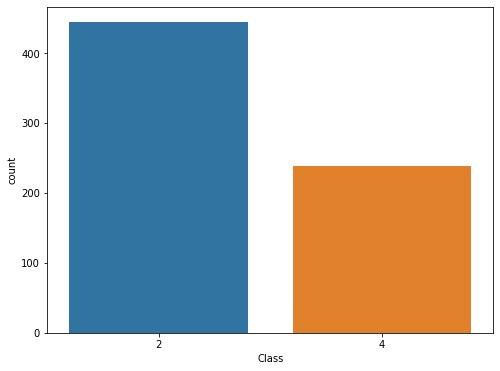

In [21]:
# Benign and Malignant count
print("Number of Benign {benign_count}\nMalignant count: {malignant_count}" 
.format(benign_count = breast_cancer_data['Class'].value_counts()[0], malignant_count = breast_cancer_data['Class'].value_counts()[1]))

plt.figure(figsize=(8,6))
labels_count = sns.countplot(labels_data, label="Count")

**Note:** We can see that the `dataset is imbalanced`, as the number of Benign samples is larger than the Malignant samples, so we `will need to balance the dataset`.

#### **3.2 Normalization**

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Creating an Object of StandardScaler
scaler = MinMaxScaler()

# Fit the dataframe to the scaler
print(scaler.fit(features_data))

MinMaxScaler()


In [23]:
# Transform the dataframe
features_scaled = scaler.transform(features_data)

# Convertin the scaled array to dataframe
features_scaled = pd.DataFrame(features_scaled, columns=features_data.columns)

features_scaled.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


## **4. Training Pipeline**

The below section includes:
1. 10-Fold Cross Validation 
   
2. K-NN Classifier
   
3. Evaluation Metrics

4. Fine-tuning K-NN Model - Hyperparameter Optimization
  * A. Elbow Method
  
  * B. Grid Search

#### **4.1 10-Fold Cross Validation**

In [24]:
from sklearn.model_selection import KFold

## K-Fold cross validation with K=10 following main reference (Mahesh et al., 2022)
## "An Efficient Ensemble Method Using K-Fold Cross Validation for the Early Detection of Benign and Malignant Breast Cancer"
kf = KFold(n_splits=10, shuffle =True)

for train_index, test_index in kf.split(features_scaled):
      X_train, X_test = features_scaled.iloc[train_index], features_scaled.iloc[test_index]
      y_train, y_test = labels_data.iloc[train_index], labels_data.iloc[test_index]


In [25]:
print('X_train Shape is  ' , X_train.shape)
print('X_test Shape is  ' , X_test.shape)
print('y_train Shape is  ' ,y_train.shape)
print('y_test Shape is  ' , y_test.shape)

X_train Shape is   (615, 9)
X_test Shape is   (68, 9)
y_train Shape is   (615,)
y_test Shape is   (68,)


#### **4.2 K-NN Classifier**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

## KNN Classifier with K=3 refers to https://sci-hub.se/https://doi.org/10.1080/02533839.2019.1676658 table 9 
## (Mushtaq et al., 2019) Effective K-nearest neighbor classifications for Wisconsin breast cancer data sets
## and
## (Akbugday, 2019) Classification of Breast Cancer Data Using Machine Learning Algorithms
## https://doi.org/10.1109/TIPTEKNO.2019.8895222
knn = KNeighborsClassifier(n_neighbors=3,  weights='uniform', metric='euclidean')

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

score = knn.score(X_test, y_test)

print("Model Accuracy: % {}".format(score*100))

Model Accuracy: % 94.11764705882352


#### **4.3 Evaluation Metrics**

In [27]:
# Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

# Accuracy Score
from sklearn.metrics import accuracy_score

# Precision Score
from sklearn.metrics import precision_score

# Sensitivity Score
from sklearn.metrics import recall_score

# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [28]:
# Classification Report and Confusion Matrix
print("Novel k-NN Classification Report:",)
cv_report = classification_report(y_test, pred)
print (cv_report)

conf_mat = confusion_matrix(y_test, pred)
cv_confusion = pd.DataFrame(conf_mat, index=['Benign','Malignant'], 
                            columns=['Benign','Malignant'])
print(cv_confusion)

#print("Classification Report\n",classification_report(y_test, pred), 
#"\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

# Accuracy Score for whole of Test Data
print("\nAccuracy Score",accuracy_score(y_test, pred))
# Precision Score for whole of Test Data
print("Precision Score",precision_score(y_test, pred, average='binary', pos_label=4))
# Sensitivity Score for whole of Test Data
print("Sensitivity Score",recall_score(y_test, pred, average='binary', pos_label=4))

Novel k-NN Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.95      0.95        43
           4       0.92      0.92      0.92        25

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

           Benign  Malignant
Benign         41          2
Malignant       2         23

Accuracy Score 0.9411764705882353
Precision Score 0.92
Sensitivity Score 0.92


In [29]:
cv_confusion = pd.DataFrame(conf_mat, index=['Benign','Malignant'], 
                            columns=['Benign','Malignant'])
cv_confusion

,Benign,Malignant
Benign,41,2
Malignant,2,23


#### **4.4 Finetuning the K-NN model - Hyperparameter Optimization**

* Hyperparamerter tuning is a process of tuning the hyperparameters of a model to obtain the best possible performance.
  
* Optimal values for hyperparameters `reduced` the `noise on classification` and `overfitting` of the model.

* In this project the Hyperparameter Optimization is done using two techniques:
  
  * Elbow Method

  * Grid Search

#### **A. Elbow Method**

**Error Rate vs N_Neighbors**

In [30]:
error_rate = []

# Range of n_neighbors for KNN
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [31]:
# Sort error_rate and n_neighbors in ascending order
sorted_indices = np.argsort(error_rate)
sorted_error_rate = np.array(error_rate)[sorted_indices]
sorted_n_neighbors = np.arange(1, 40)[sorted_indices]

for error, neighbors in zip(sorted_error_rate, sorted_n_neighbors):
    print('Error Rate:', error)
    print('n_neighbors:', neighbors)
    print('---')

Error Rate: 0.029411764705882353
n_neighbors: 20
---
Error Rate: 0.029411764705882353
n_neighbors: 22
---
Error Rate: 0.029411764705882353
n_neighbors: 23
---
Error Rate: 0.029411764705882353
n_neighbors: 24
---
Error Rate: 0.029411764705882353
n_neighbors: 25
---
Error Rate: 0.029411764705882353
n_neighbors: 26
---
Error Rate: 0.029411764705882353
n_neighbors: 27
---
Error Rate: 0.029411764705882353
n_neighbors: 28
---
Error Rate: 0.029411764705882353
n_neighbors: 21
---
Error Rate: 0.029411764705882353
n_neighbors: 29
---
Error Rate: 0.029411764705882353
n_neighbors: 31
---
Error Rate: 0.029411764705882353
n_neighbors: 32
---
Error Rate: 0.029411764705882353
n_neighbors: 33
---
Error Rate: 0.029411764705882353
n_neighbors: 34
---
Error Rate: 0.029411764705882353
n_neighbors: 35
---
Error Rate: 0.029411764705882353
n_neighbors: 36
---
Error Rate: 0.029411764705882353
n_neighbors: 37
---
Error Rate: 0.029411764705882353
n_neighbors: 30
---
Error Rate: 0.029411764705882353
n_neighbors: 

In [32]:
print(error_rate)

[0.058823529411764705, 0.07352941176470588, 0.058823529411764705, 0.04411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353]


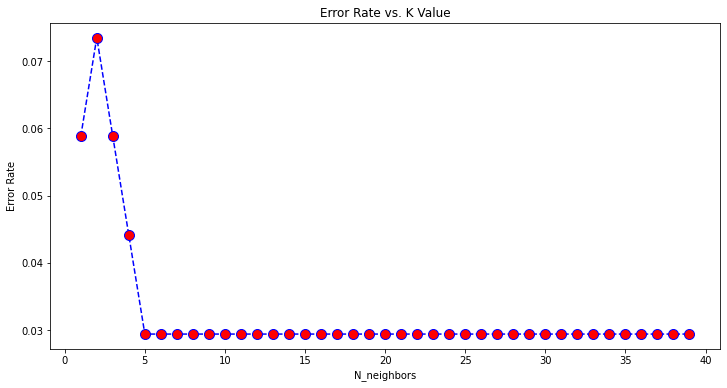

In [39]:
plt.figure(figsize=(12,6))

error_rate_plot = plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', 
    markerfacecolor='red', markersize=10)

error_rate_plot = plt.title('Error Rate vs. K Value')

error_rate_plot = plt.xlabel('N_neighbors')

error_rate_plot = plt.ylabel('Error Rate')

From the above plot its evident that `Error Rate` is  `increasing` for higher values of n_neighbors. The *optimal value* for n_neighbors from the above plot is *7,11,12,13,14*.

In [40]:
print("Error Rate of n_neighbours value 5 : ", error_rate[5])

Error Rate of n_neighbours value 5 :  0.029411764705882353


#### **B. Grid Search**

In [41]:
# Grid Search from Model Selection Library
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                                 24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]}

# Grid Search on KNN for 4-fold cross validation
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [42]:
print('The best score: ', g_res.best_score_)

print('The best parameter: ', g_res.best_params_)

The best score:  0.967479674796748
The best parameter:  {'n_neighbors': 5}


In [43]:
import numpy as np

allscores = g_res.cv_results_['mean_test_score']
allparams = g_res.cv_results_['params']

sorted_indices = np.argsort(allscores)[::-1]  # Sort indices in descending order
sorted_scores = allscores[sorted_indices]
sorted_params = [allparams[i] for i in sorted_indices]

for score, params in zip(sorted_scores, sorted_params):
    print('Score:', score)
    print('Params:', params)
    print('---')

Score: 0.967479674796748
Params: {'n_neighbors': 5}
---
Score: 0.967479674796748
Params: {'n_neighbors': 11}
---
Score: 0.967479674796748
Params: {'n_neighbors': 7}
---
Score: 0.967479674796748
Params: {'n_neighbors': 9}
---
Score: 0.9658536585365856
Params: {'n_neighbors': 8}
---
Score: 0.9658536585365853
Params: {'n_neighbors': 13}
---
Score: 0.9658536585365853
Params: {'n_neighbors': 12}
---
Score: 0.9658536585365853
Params: {'n_neighbors': 10}
---
Score: 0.9626016260162601
Params: {'n_neighbors': 6}
---
Score: 0.9626016260162601
Params: {'n_neighbors': 14}
---
Score: 0.9626016260162601
Params: {'n_neighbors': 15}
---
Score: 0.9626016260162601
Params: {'n_neighbors': 16}
---
Score: 0.9626016260162601
Params: {'n_neighbors': 17}
---
Score: 0.9609756097560975
Params: {'n_neighbors': 18}
---
Score: 0.9609756097560975
Params: {'n_neighbors': 19}
---
Score: 0.959349593495935
Params: {'n_neighbors': 21}
---
Score: 0.959349593495935
Params: {'n_neighbors': 20}
---
Score: 0.959349593495935


In [44]:
## KNN Classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5,  weights='uniform', metric='euclidean')

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

score = knn.score(X_test, y_test)

print("Model Accuracy: % {}".format(score*100))

Model Accuracy: % 97.05882352941177


In [45]:
# Classification Report and Confusion Matrix
print("Hyperparameter Tuned k-NN\n\nClassification Report\n")
cv_report = classification_report(y_test, pred)
print (cv_report)

conf_mat = confusion_matrix(y_test, pred)
cv_confusion = pd.DataFrame(conf_mat, index=['Benign','Malignant'], 
                            columns=['Benign','Malignant'])
print(cv_confusion)

# Accuracy Score for whole of Test Data
print("\nAccuracy Score",accuracy_score(y_test, pred))

# Precision Score for whole of Test Data
print("Precision Score",precision_score(y_test, pred, average='binary', pos_label=4))

# Sensitivity Score for whole of Test Data
print("Sensitivity Score",recall_score(y_test, pred, average='binary', pos_label=4))

Hyperparameter Tuned k-NN

Classification Report

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        43
           4       0.96      0.96      0.96        25

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

           Benign  Malignant
Benign         42          1
Malignant       1         24

Accuracy Score 0.9705882352941176
Precision Score 0.96
Sensitivity Score 0.96


#### **3.2 Feature Selection with RFECV**

* Baseline score is used as the measure of WBCD classification performance before feature selection

In [68]:
# Baseline score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

RF=RandomForestClassifier(random_state=0)
predRF = RF.fit(X_train, y_train)
print("Baseline Accuracy Score",accuracy_score(y_test,predRF.predict(X_test)))

Baseline Accuracy Score 0.9264705882352942


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

RF=RandomForestClassifier(random_state=0)
kf = KFold(n_splits=10, shuffle =True)
rfecv=RFECV(estimator=RF,step=1,cv=kf,scoring='accuracy')
#since it uses cross validation, this research fit it to the whole dataset
rfecv.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
      estimator=RandomForestClassifier(random_state=0), scoring='accuracy')

In [70]:
#to get number of the features
print('Optimal number of features:', rfecv.n_features_)

#to get feature names
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features: 8
Best features : Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli'],
      dtype='object')


In [71]:
mean_scores = rfecv.cv_results_['mean_test_score']
num_features = range(1, len(mean_scores) + 1)  # Number of features or RFECV iterations

sorted_indices = np.argsort(mean_scores)[::-1]  # Sort indices in descending order
sorted_scores = mean_scores[sorted_indices]
sorted_num_features = [num_features[i] for i in sorted_indices]

for score, num_features in zip(sorted_scores, sorted_num_features):
    print('Mean Test Score:', score)
    print('Number of Features or RFECV Iterations:', num_features)
    print('---')

Mean Test Score: 0.975542041248017
Number of Features or RFECV Iterations: 8
---
Mean Test Score: 0.9739291380222106
Number of Features or RFECV Iterations: 7
---
Mean Test Score: 0.9722897937599155
Number of Features or RFECV Iterations: 9
---
Mean Test Score: 0.9690111052353252
Number of Features or RFECV Iterations: 6
---
Mean Test Score: 0.9673982020095189
Number of Features or RFECV Iterations: 5
---
Mean Test Score: 0.964172395557906
Number of Features or RFECV Iterations: 4
---
Mean Test Score: 0.9577207826546802
Number of Features or RFECV Iterations: 3
---
Mean Test Score: 0.9414331041776837
Number of Features or RFECV Iterations: 2
---
Mean Test Score: 0.929904812268641
Number of Features or RFECV Iterations: 1
---


In [72]:
rfecv.cv_results_['mean_test_score']

array([0.92990481, 0.9414331 , 0.95772078, 0.9641724 , 0.9673982 ,
       0.96901111, 0.97392914, 0.97554204, 0.97228979])

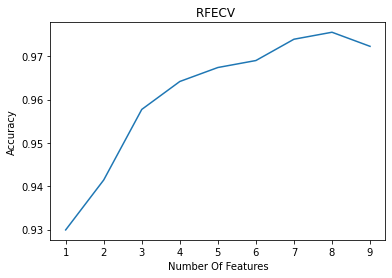

In [73]:
#We can see that the best number of features is 8
# Data Visualization
import matplotlib.pyplot as plt
plt.title("RFECV ")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

**Dropping irrelevant features eliminated by RFECV**

In [74]:
# List of correlated features, planned to drop
drop_list = X_train.columns[~rfecv.support_]
print("Dropped feature :",drop_list)

# Updated scaled features dataset
features_updated = features_scaled.drop(drop_list,axis = 1)
features_updated.head()

Dropped feature : Index(['Mitoses'], dtype='object')


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000


In [75]:
print("Shape after dropping correlated features",features_updated.shape)

Shape after dropping correlated features (683, 8)


In [76]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle =True)

for train_index, test_index in kf.split(features_updated):
      X_train, X_test = features_updated.iloc[train_index], features_updated.iloc[test_index]
      y_train, y_test = labels_data.iloc[train_index], labels_data.iloc[test_index]

print('X_train Shape is  ' , X_train.shape)
print('X_test Shape is  ' , X_test.shape)
print('y_train Shape is  ' ,y_train.shape)
print('y_test Shape is  ' , y_test.shape)

X_train Shape is   (615, 8)
X_test Shape is   (68, 8)
y_train Shape is   (615,)
y_test Shape is   (68,)


In [77]:
RF=RandomForestClassifier(random_state=0)
predRF = RF.fit(X_train, y_train)
# score=cross_val_score(RF,features_data,labels_data,cv=cv,scoring='accuracy')
print("Baseline Accuracy Score",accuracy_score(y_test,predRF.predict(X_test)))

Baseline Accuracy Score 0.9852941176470589


#### **3.2.1 Is our Feature Selection right?**

In [78]:
## KNN Classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5,  weights='uniform', metric='euclidean')

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

print("RFECV Hyperparameter Tuned k-NN\n\nClassification Report\n",classification_report(y_test, pred))

print("\nConfusion Matrix\n")
conf_mat = confusion_matrix(y_test, pred)
cv_confusion = pd.DataFrame(conf_mat, index=['Benign','Malignant'], 
                            columns=['Benign','Malignant'])
print(cv_confusion)

print("\nAccuracy Score",accuracy_score(y_test, pred))

# Precision Score for whole of Test Data
print("Precision Score",precision_score(y_test, pred, average='binary', pos_label=4))

# Sensitivity Score for whole of Test Data
print("Sensitivity Score",recall_score(y_test, pred, average='binary', pos_label=4))

RFECV Hyperparameter Tuned k-NN

Classification Report
               precision    recall  f1-score   support

           2       0.97      0.97      0.97        38
           4       0.97      0.97      0.97        30

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68


Confusion Matrix

           Benign  Malignant
Benign         37          1
Malignant       1         29

Accuracy Score 0.9705882352941176
Precision Score 0.9666666666666667
Sensitivity Score 0.9666666666666667


## **Conclusion**